In [8]:
import keras
import numpy as np
import time
import warnings

from eigenpro import kernels
from eigenpro import mnist
from eigenpro import ciphar
from eigenpro import synthetic
from eigenpro import utils
from eigenpro import training

In [9]:
### Dataset

dataset_dict = {}

num_classes = 10
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load()
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
dataset_dict['MNIST'] = dataset

# num_classes = 10
# (x_train_full, y_train_full), (x_test_full, y_test_full) = ciphar.load()
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['CIPHAR'] = dataset

# num_classes = 2
# (x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(1)
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['Synthetic1'] = dataset

# num_classes = 2
# (x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(2)
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['Synthetic2'] = dataset

Load MNIST dataset.
60000 train samples
10000 test samples


In [4]:
### Kernel

kernel_dict = {}

sg = 5
kernel_sgd_g1 = lambda x,y: kernels.Gaussian(x, y, sg)
kernel_inv_g1 = lambda x,y: training.Gaussian(x, y, sg)
kernel_dict["Gaussian *1"] = (kernel_sgd_g1, kernel_inv_g1)

kernel_sgd_g05 = lambda x,y: kernels.Gaussian(x, y, sg / 2)
kernel_inv_g05 = lambda x,y: training.Gaussian(x, y, sg / 2)
kernel_dict["Gaussian /2"] = (kernel_sgd_g05, kernel_inv_g05)

kernel_sgd_g2 = lambda x,y: kernels.Gaussian(x, y, sg * 2)
kernel_inv_g2 = lambda x,y: training.Gaussian(x, y, sg * 2)
kernel_dict["Gaussian *2"] = (kernel_sgd_g2, kernel_inv_g2)


sl = 10
kernel_sgd_l1 = lambda x,y: kernels.Laplace(x, y, sl)
kernel_inv_l1 = lambda x,y: training.Laplace(x, y, sl)
kernel_dict["Laplace *1"] = (kernel_sgd_l1, kernel_inv_l1)

kernel_sgd_l05 = lambda x,y: kernels.Laplace(x, y, sl / 2)
kernel_inv_l05 = lambda x,y: training.Laplace(x, y, sl / 2)
kernel_dict["Laplace /2"] = (kernel_sgd_l05, kernel_inv_l05)

kernel_sgd_l2 = lambda x,y: kernels.Laplace(x, y, sl * 2)
kernel_inv_l2 = lambda x,y: training.Laplace(x, y, sl * 2)
kernel_dict["Laplace *2"] = (kernel_sgd_l2, kernel_inv_l2)



### Size 

size_list = [200]
# size_list = [10000] # or [60000]



### Noise

# noise_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
noise_list = [0, 33, 67, 100]


### Training

trainers = training.training(dataset_dict, kernel_dict, size_list, noise_list)

with open('output/figure8-' + time.strftime("%Y%m%d-%H%M%S") + '.txt', 'w') as f:
    print(trainers, file=f)

In [2]:
trainers = eval(open('figure8.txt', 'r').read())
trainers

# 'D:MNIST K:Laplace /2 S:400 N:33': {'dataset': 'MNIST',
#   'kernel': 'Laplace /2',
#   'size': 400,
#   'noise': 33,
#   'sgd_ce': 0.4948,
#   'iterations': 14,
#   'inv_ce': 0.5082,
#   'inv_norm': 106.41094,
#   'sgd_norm': 75.30764},

{'D:MNIST K:Gaussian *1 S:200 N:0': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 200,
  'noise': 0,
  'sgd_ce': 0.24209999999999998,
  'iterations': 2,
  'inv_ce': 0.2134,
  'inv_norm': 34.135395,
  'sgd_norm': 17.269548},
 'D:MNIST K:Gaussian *1 S:200 N:33': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 200,
  'noise': 33,
  'sgd_ce': 0.5871,
  'iterations': 6,
  'inv_ce': 0.6183,
  'inv_norm': 53.56208,
  'sgd_norm': 35.32743},
 'D:MNIST K:Gaussian *1 S:200 N:67': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 200,
  'noise': 67,
  'sgd_ce': 0.8325,
  'iterations': 4,
  'inv_ce': 0.8473,
  'inv_norm': 62.8481,
  'sgd_norm': 30.651945},
 'D:MNIST K:Gaussian *1 S:200 N:100': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 200,
  'noise': 100,
  'sgd_ce': 0.9049,
  'iterations': 5,
  'inv_ce': 0.9035,
  'inv_norm': 62.691574,
  'sgd_norm': 34.78188},
 'D:MNIST K:Gaussian /2 S:200 N:0': {'dataset': 'MNIST',
  'kernel': 'Gaussian /2',
  'size'

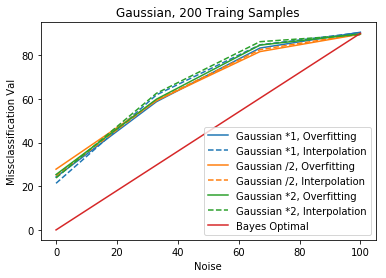

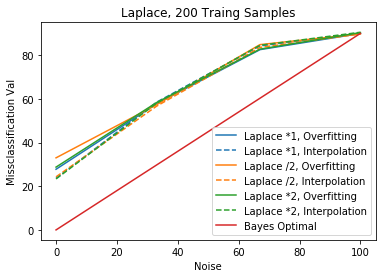

In [10]:
# Noise vs Error

import matplotlib.pyplot as plt
ax = plt.gca()

this_size = size_list[0]

for this_dataset in dataset_dict.keys():    
    
#     for kernel_type in ['Laplace']:
    for kernel_type in ['Gaussian', 'Laplace']:        
        
        ax.set_prop_cycle(None)

        for this_kernel in kernel_dict.keys():
                
            if not kernel_type in this_kernel:
                continue
                
            inv = []
            sgd = []
            noise = []

            for name, trainer in trainers.items():  

                if trainer['dataset'] != this_dataset:
                    continue

                if trainer['size'] != this_size:
                    continue

                if trainer['kernel'] != this_kernel:
                    continue

                sgd.append(trainer['sgd_ce'] * 100)
                inv.append(trainer['inv_ce'] * 100)
                noise.append(trainer['noise'])

            color = next(ax._get_lines.prop_cycler)['color']
            plt.plot(noise, sgd, label=this_kernel + ', Overfitting', color=color) 
            plt.plot(noise, inv, '--', label=this_kernel + ', Interpolation', color=color)     

        
        color = next(ax._get_lines.prop_cycler)['color']
        bayes = [(90) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)
            
        plt.title(kernel_type + ', ' + str(this_size) + ' Traing Samples')
        plt.xlabel('Noise')
        plt.ylabel('Missclassification Val')
        plt.legend(loc='lower right')
        plt.show()

In [6]:
# del trainers